ORIE 4580:  Simulation with Confidence Intervals
=====
Sid Banerjee, Cornell

Notebook demonstrating basics of confidence intervals

In [3]:
# Preamble to make sure we have all packages we need
import numpy as np
from scipy import stats

# Configuring matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.style.use('dark_background')
plt.rcParams["image.cmap"] = 'Set3'

# Choosing a colormap for the plot colors
cmap=plt.get_cmap('Set3')

import seaborn as sns

Function for adding (fixed-sample) confidence intervals to your histograms in Python

In [4]:
def plot_mean_and_ci(fig,data,alpha = 0.95,plotCI=1):
    mean = np.mean(data)

    z = stats.norm.ppf(0.5 + alpha/2.0)    
    # ppf or 'percentile point function' is the inverse of the cdf. 
    # Refer https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

    half_width_alpha = z*np.std(data,ddof=1)/np.sqrt(num_samples)
    ucb = mean + half_width_alpha
    lcb = mean - half_width_alpha
    
    plt.axvline(mean,color = 'g',label='sample mean',lw=2)
    if plotCI:
      plt.axvspan(lcb, ucb, alpha=0.5, color='y',label='95% confidence interval')
    return mean,half_width_alpha

Let us try this for the food bank volunteers example in class (to understand the relation between $\mathbb{E}\left[\frac{Y}{X}\right]$ and $\frac{\mathbb{E}[Y]}{\mathbb{E}[X]}$)

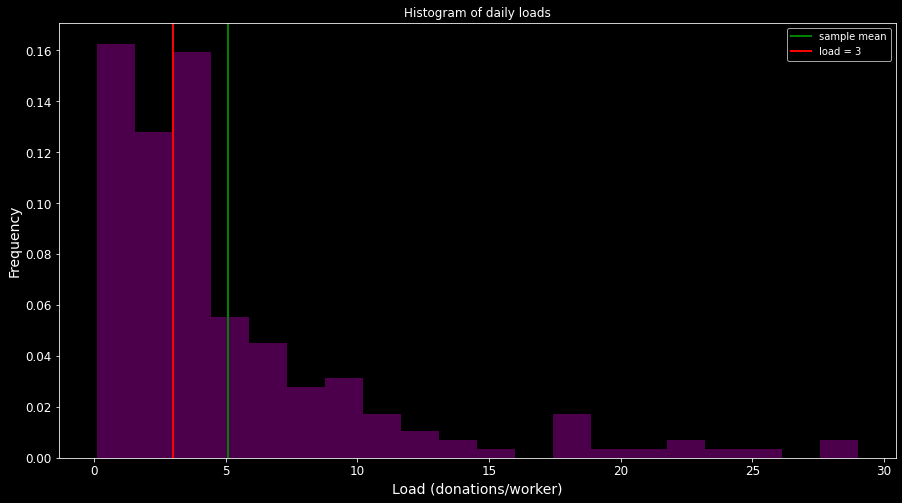

In [11]:
np.random.seed(10)

num_samples = 200
n = np.arange(1,num_samples+1)

max_workers = 9
max_donations = 29
load = np.array([])

for i in n:
    workers = np.random.randint(low = 1,high = max_workers+1)
    donations = np.random.randint(low = 1,high = max_donations+1)
    load = np.append(load,donations/workers) 

# Need to pass the plot to the confidence interval plotter        
fig = plt.figure(figsize=(15,8))

# As an alternative to the matplotlib hist function, we can also use the distplot function in Seaborn. 
# This has some nice additional features such as automatic bin-size selection, plotting the samples, etc.
# Refer seaborn.pydata.org/generated/seaborn.distplot.html for details
sns.distplot(load, norm_hist = True, rug = False, kde = False,color='m')

mean,half_width_alpha = plot_mean_and_ci(fig,load,plotCI=0)

# Plotting E[Y]/E[X]
plt.axvline((max_donations+1)/(max_workers+1),color = 'r',alpha=1,lw = 2,label='load = 3')

#plt.grid(True)
plt.xlabel('Load (donations/worker)')
plt.ylabel('Frequency')
plt.title('Histogram of daily loads')
plt.legend(loc=1)
plt.show()

Adding confidence intervals to the plot

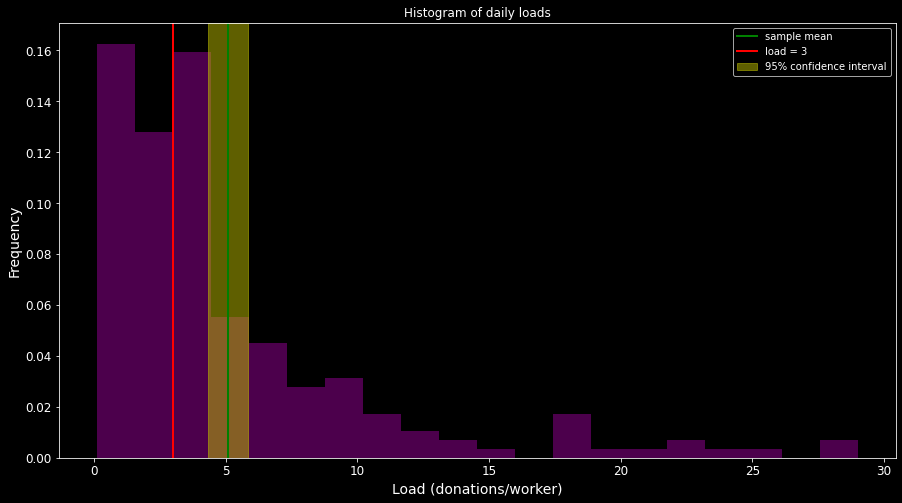

In [12]:
fig = plt.figure(figsize=(15,8))
sns.distplot(load, norm_hist = True, rug = False, kde = False,color='m')
mean,half_width_alpha = plot_mean_and_ci(fig,load,plotCI=1)
plt.axvline((max_donations+1)/(max_workers+1),color = 'r',alpha=1,lw = 2,label='load = 3')

#plt.grid(True)
plt.xlabel('Load (donations/worker)')
plt.ylabel('Frequency')
plt.title('Histogram of daily loads')
plt.legend(loc=1)
plt.show()

We can also compute the sample mean to get:

In [13]:
print( "mean estimate = {0:.2f}".format(mean) + ' ± ' + "{0:.2f}".format(half_width_alpha))

mean estimate = 5.09 ± 0.75


Note that this is greater than $\frac{\mathbb{E}[Y]}{\mathbb{E}[X]} = \frac{30}{10} = 3$ 

This is what Jensen's inequality predicts as well, since $\mathbb{E}\left[\frac{Y}{X}\right] = \mathbb{E}[Y]\cdot\mathbb{E}\left[\frac{1}{X}\right] \geq \frac{\mathbb{E}[Y]}{\mathbb{E}[X]}$